# Support Vector Machines (SVM)
## Load a binary classification dataset Iris dataset.
## Implement SVM with different kernels (linear, polynomial, RBF) using scikit-learn.
## Evaluate the models and visualize the decision boundaries.

## Importing required libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.inspection import DecisionBoundaryDisplay

### Loading Dataset

In [2]:
# Load Iris dataset
iris = datasets.load_iris()

In [3]:
# dataset description
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
# dataset size
iris['data'].shape

(150, 4)

In [5]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Storing data in DataFrame

In [7]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Preprocessing the Dataset

In [8]:
# Check for missing values
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

#### Ploting BoxPlot for IQR

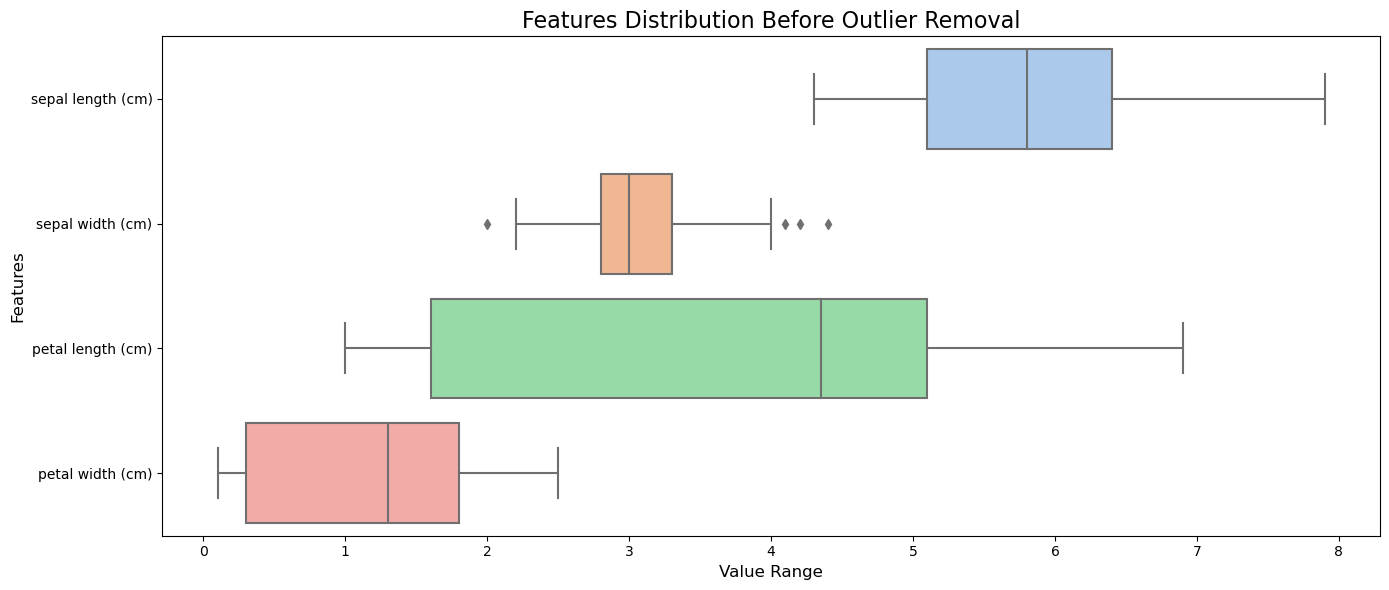

In [9]:
# Visualize boxplots before outlier removal
plt.figure(figsize=(14, 6))
sns.boxplot(data=iris_df[iris.feature_names], orient="h", palette="pastel")
plt.title('Features Distribution Before Outlier Removal', fontsize=16)
plt.xlabel('Value Range', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [10]:
df_clean = iris_df.copy()
for column in iris.feature_names:
    Q1 = iris_df[column].quantile(0.25)
    Q3 = iris_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]    
df_clean

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Spliting of Dataset into train test data

In [12]:
# Split features and target
X = df_clean.drop('target', axis=1)
y = df_clean['target']

In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling dataset

In [14]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Training diffrent kernels of SVM


Training SVM with linear kernel
Best Parameters: {'C': 1}
Accuracy on test data: 0.97
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.88      0.93         8
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



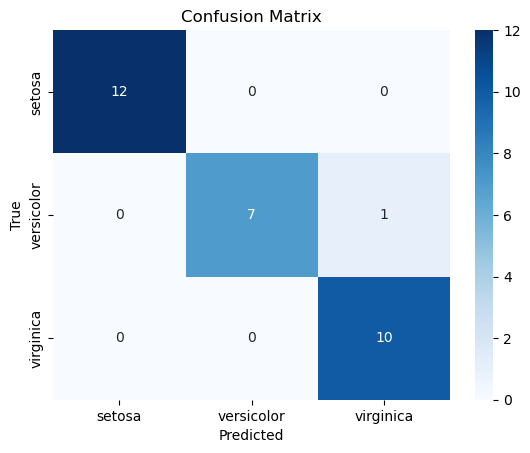


Training SVM with poly kernel
Best Parameters: {'C': 10, 'degree': 3, 'gamma': 'scale'}
Accuracy on test data: 0.97
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      1.00      0.94         8
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



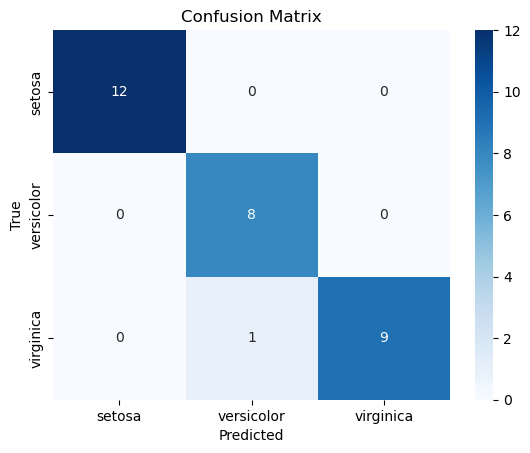


Training SVM with rbf kernel
Best Parameters: {'C': 1, 'gamma': 'scale'}
Accuracy on test data: 0.97
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      1.00      0.94         8
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



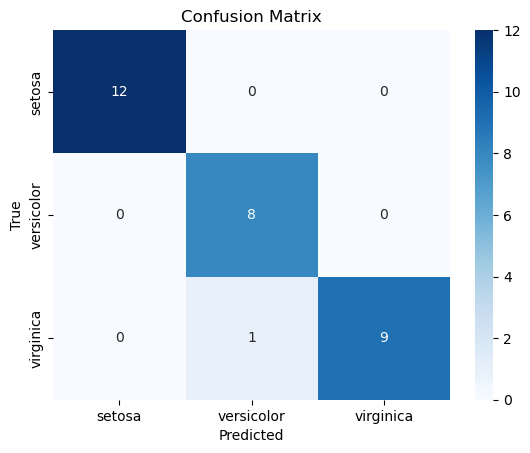

In [24]:
# Define kernels
kernels = ['linear', 'poly', 'rbf']
results = {}
binary_filter = y < 2
X = X[binary_filter]
y = y[binary_filter]
for kernel in kernels:
    print(f"\nTraining SVM with {kernel} kernel")
    
    # Hyperparameter tuning with GridSearchCV
    if kernel == 'linear':
        param_grid = {'C': [0.1, 1, 10, 100]}
    elif kernel == 'poly':
        param_grid = {'C': [0.1, 1, 10], 'degree': [2, 3, 4], 'gamma': ['scale', 'auto']}
    elif kernel == 'rbf':
        param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}
    
    grid = GridSearchCV(SVC(kernel=kernel), param_grid, cv=5)
    grid.fit(X_train, y_train)
    
    # Best model
    best_model = grid.best_estimator_
    print(f"Best Parameters: {grid.best_params_}")
    
    # Evaluate on test data
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy on test data: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Store results
    results[kernel] = {
        'model': best_model,
        'accuracy': accuracy,
        'classification_report': classification_report(y_test, y_pred, output_dict=True)
    }

## Evaluation of Model

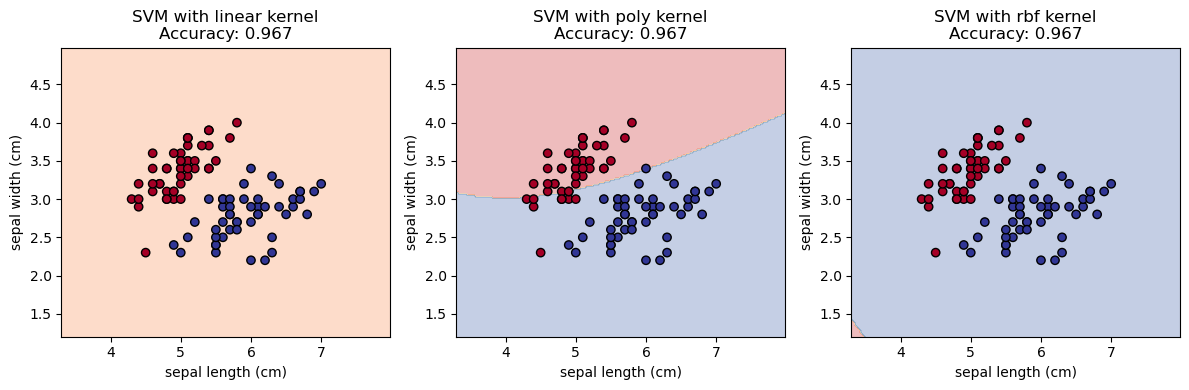


Results for linear kernel:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.88      0.93         8
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30


Results for poly kernel:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      1.00      0.94         8
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30


Results for rbf kernel:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      1.00      0.94       

In [31]:
# Define a function for decision boundary visualization
def plot_decision_boundary(X, y, model, title):
    h = 0.02  # Mesh step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

     # Create input for prediction using all features
    # We are using only the first two features for visualization, 
    # but the model expects all four. We create a dummy array 
    # with zeros for the remaining two features.
    
    # Reshape xx and yy to have the same number of rows as the original data
    num_samples = xx.ravel().shape[0]
    
    # Create a dummy array with zeros for the remaining features
    dummy_features = np.zeros((num_samples, 2))  # Assuming 2 extra features

    # Stack the features horizontally to create the final input
    X_grid = np.hstack([xx.reshape(-1, 1), yy.reshape(-1, 1), dummy_features])
    
    
    Z = model.predict(X_grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor="k")
    plt.title(f"SVM with {title} kernel\nAccuracy: {results[title]['accuracy']:.3f}")
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])


# Plot results
plt.figure(figsize=(12, 4))
for i, kernel in enumerate(kernels, 1):
    plt.subplot(1, 3, i)
    plot_decision_boundary(X, y, results[kernel]["model"], kernel)
plt.tight_layout()
plt.show()

# Print classification reports
for kernel in kernels:
    print(f"\nResults for {kernel} kernel:")
    print(classification_report(y_test, results[kernel]["model"].predict(X_test)))